<a href="https://colab.research.google.com/github/mytimeyinji/yinji/blob/master/dalao_quanlianjie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考网址;https://blog.csdn.net/qq_40438165/article/details/105846692



In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

TensorFlow 1.x selected.


(60000, 28, 28) (10000, 28, 28)


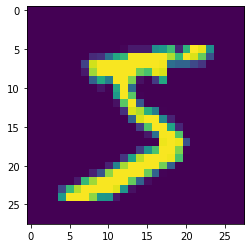

In [32]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 加载数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)
#print(train_images[0])
#print(train_labels[0])
plt.imshow(train_images[0])
plt.show()

将图片由二维铺开成一维

在转换为one-hot编码之前,添加以下代码

In [33]:
from keras.utils import to_categorical

train_labels = train_labels.reshape(train_labels.shape[0])
test_labels = test_labels.reshape(test_labels.shape[0])
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)


train_images = train_images.reshape((60000, 28*28)).astype('float')
test_images = test_images.reshape((10000, 28*28)).astype('float')
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


搭建神经网络

关于神经网络中隐藏层和神经元的深入理解
https://blog.csdn.net/chinwuforwork/article/details/84141078 

In [0]:
from keras import models, layers, regularizers
from keras.optimizers import RMSprop
network = models.Sequential()
#network.add(layers.Dense(units=15, activation='relu', input_shape=(28*28, ),))

#拓展测试：隐藏层的个数改为128个神经元，以及多加了一层隐藏层（神经网络的结构变得复杂）
network.add(layers.Dense(units=128, activation='relu', input_shape=(28*28, ),kernel_regularizer=regularizers.l1(0.0001)))
network.add(layers.Dropout(0.01))
network.add(layers.Dense(units=32, activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
network.add(layers.Dropout(0.01))

network.add(layers.Dense(units=10, activation='softmax'))

#print(network.summary())


神经网络训练
1、编译：确定优化器和损失函数等
2、训练网络：确定训练的数据、训练的轮数和每次训练的样本数等

将y转换为one-hot编码后，y都是三维的。
但是dense_2得到的输出是二维的。
维度信息不匹配。将程序放到同学的电脑上跑时，得到的却是二维的。说明程序没有问题，可能是我的环境存在小问题。解决方法：https://blog.csdn.net/weixin_41735859/article/details/86288356

In [39]:
# 编译步骤
network.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# 训练网络，用fit函数, epochs表示训练多少个回合， batch_size表示每次训练给多大的数据
network.fit(train_images, train_labels, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
 - 2s - loss: 2.7782 - accuracy: 0.4807
Epoch 2/20
 - 2s - loss: 1.2786 - accuracy: 0.7135
Epoch 3/20
 - 2s - loss: 0.7329 - accuracy: 0.8793
Epoch 4/20
 - 2s - loss: 0.4862 - accuracy: 0.9214
Epoch 5/20
 - 3s - loss: 0.3937 - accuracy: 0.9409
Epoch 6/20
 - 3s - loss: 0.3324 - accuracy: 0.9537
Epoch 7/20
 - 3s - loss: 0.3000 - accuracy: 0.9577
Epoch 8/20
 - 2s - loss: 0.2733 - accuracy: 0.9625
Epoch 9/20
 - 2s - loss: 0.2548 - accuracy: 0.9646
Epoch 10/20
 - 2s - loss: 0.2478 - accuracy: 0.9656
Epoch 11/20
 - 2s - loss: 0.2345 - accuracy: 0.9670
Epoch 12/20
 - 2s - loss: 0.2271 - accuracy: 0.9681
Epoch 13/20
 - 2s - loss: 0.2189 - accuracy: 0.9697
Epoch 14/20
 - 2s - loss: 0.2118 - accuracy: 0.9711
Epoch 15/20
 - 2s - loss: 0.2111 - accuracy: 0.9712
Epoch 16/20
 - 2s - loss: 0.2092 - accuracy: 0.9706
Epoch 17/20
 - 2s - loss: 0.2032 - accuracy: 0.9718
Epoch 18/20
 - 2s - loss: 0.2011 - accuracy: 0.9717
Epoch 19/20
 - 2s - loss: 0.1957 - accuracy: 0.9722
Epoch 20/20
 - 2s - l

用训练好的模型进行预测，并在测试集上做出评价

In [40]:
# 来在测试集上测试一下模型的性能吧
y_pre = network.predict(test_images[:5])
print(y_pre, test_labels[:5])
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print("test_loss:", test_loss, "   test_accuracy:", test_accuracy)

[[1.9894319e-34 9.4194162e-34 1.7504903e-20 5.3907326e-22 2.8973526e-22
  1.2875964e-15 0.0000000e+00 1.0000000e+00 1.2586976e-27 1.9505690e-08]
 [3.6535220e-36 5.8566688e-06 9.9981135e-01 1.8277689e-04 0.0000000e+00
  7.6722056e-14 0.0000000e+00 2.6505917e-08 1.3291404e-08 0.0000000e+00]
 [1.2672270e-14 9.9992633e-01 3.2812230e-05 2.9255236e-08 4.9876398e-06
  1.3960020e-07 2.2478629e-10 1.6690502e-07 3.5463465e-05 4.5355995e-09]
 [9.9996293e-01 1.3922042e-05 5.0305966e-06 1.1760511e-05 3.1201324e-08
  2.3230814e-06 1.4098132e-06 1.4440547e-09 1.1464870e-06 1.4299375e-06]
 [8.5660560e-24 8.7806154e-15 6.8330731e-14 4.6777970e-31 1.0000000e+00
  8.8755890e-21 6.6491463e-13 5.3093170e-17 4.0405901e-19 4.4289741e-09]] [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
10000/10000 [==============================] - 0s 39us/step
test_loss: 0.22795467947721482    test_accuracy:

接下来用卷积神经网络来训练手写数字，，看看准确率能达到多少，，（3个卷积层）

In [41]:
from keras.utils import to_categorical
from keras import models, layers
from keras.optimizers import RMSprop
from keras.datasets import mnist
# 加载数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 搭建LeNet网络
def LeNet():
    network = models.Sequential()
    network.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    network.add(layers.AveragePooling2D((2, 2)))
    network.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    network.add(layers.AveragePooling2D((2, 2)))
    network.add(layers.Conv2D(filters=120, kernel_size=(3, 3), activation='relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(84, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    return network
network = LeNet()
network.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 训练网络，用fit函数, epochs表示训练多少个回合， batch_size表示每次训练给多大的数据
network.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2)
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print("test_loss:", test_loss, "    test_accuracy:", test_accuracy)

Epoch 1/10
 - 20s - loss: 0.3851 - accuracy: 0.8831
Epoch 2/10
 - 20s - loss: 0.1008 - accuracy: 0.9694
Epoch 3/10
 - 20s - loss: 0.0653 - accuracy: 0.9795
Epoch 4/10
 - 20s - loss: 0.0500 - accuracy: 0.9845
Epoch 5/10
 - 19s - loss: 0.0408 - accuracy: 0.9873
Epoch 6/10
 - 20s - loss: 0.0340 - accuracy: 0.9894
Epoch 7/10
 - 24s - loss: 0.0283 - accuracy: 0.9911
Epoch 8/10
 - 20s - loss: 0.0247 - accuracy: 0.9923
Epoch 9/10
 - 20s - loss: 0.0212 - accuracy: 0.9934
Epoch 10/10
 - 20s - loss: 0.0186 - accuracy: 0.9945
10000/10000 [==============================] - 2s 214us/step
test_loss: 0.03481156985949492     test_accuracy: 0.9883999824523926
